In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})
from pydriller import Repository
from datetime import datetime
from datetime import date
import os
import pickle
from pathlib import Path
import collections
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

### Create time-stamped dataframes for Software Development Projects

The purpose of this notebook is to create a dataframe that will contain the commits done in the repositories of Software development projects and also metadata regarding those commits, like number of lines added and removed. Then aggregation is going to be performed on that dataframe in order to obtain the timeseries.


For that mining of GitHub repositories is being done with the use of open source tool, called Pydriller.

#### Mining packages

Create a dataset for three software projects: **Apache Log4j, Jackson-databind and Apache Commons-Lang**. 


This dataset is going to be created so that it has similar tree structure with the cryptocurrency dataset.
Steps:

- Mine GitHub repository and extract the commits for the particular packages.
- Extract also the lines added and removed from each commit.
- From a dataset like above perform aggregation in order to get the daily and weekly volume of commits and LOC.


After this dataset is constructed, the statistical and time series analysis will be done and finally anomaly detection algorithms are going to be implemented.

- Apache Commons

Create a list of folders

In [59]:
cwd = os.getcwd() + "/commons-lang/src/main/java/org/apache/commons/lang3"
folder_path = []
for folder in os.scandir(cwd):
    if os.path.isdir(folder):
        folder_path.append(cwd + "/" + str(folder.name))
#print(folder_path)

Parse the commits for each one of the folders ("packages") in the list

In [60]:
hashs = []
author_date = []
packages = []
deletes = []
insertions = []
loc = []
for package in folder_path:
#Parse commits with time stamp
    for commit in Repository('/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/commons-lang',
                             filepath=package).traverse_commits():
        packages.append(package.split("/")[14])
        hashs.append(commit.hash)
        deletes.append(commit.deletions)
        insertions.append(commit.insertions)
        loc.append(commit.lines)
        author_date.append(pd.to_datetime(commit.author_date).date())

Create dataframe of dates/package/commits

In [66]:
commons_lang = pd.DataFrame()
commons_lang['date'] = author_date
commons_lang['package'] = packages
commons_lang['hash_id'] = hashs
commons_lang['lines_deleted'] = deletes
commons_lang['lines_added'] = insertions
commons_lang['lines_changed'] = loc

In [67]:
commons_lang['project'] = "commons_lang"

In [99]:
commons_lang

,date,package,hash_id,lines_deleted,lines_added,lines_changed,project
0,2010-01-03,mutable,fc5c081e22a61bb5a6810af302be3f22f7966df4,0,0,0,commons_lang
1,2010-02-25,mutable,43fca0d7499c99f9e82e0ee2e52b81acdc954f2c,23,69,92,commons_lang
2,2010-07-01,mutable,c90b815dabed85666621b714ff34b469851afc51,0,11,11,commons_lang
3,2010-07-18,mutable,76c250987d52f4a956c6e617aea3481037bdf71f,8,21,29,commons_lang
4,2010-07-26,mutable,c9c9af98d828943071d49cfc7c189eeb017df381,9,9,18,commons_lang
...,...,...,...,...,...,...,...
1591,2020-06-17,event,9214c65371dded64f0a8068e7b877f97d50a024f,20,7,27,commons_lang
1592,2020-11-15,event,43b2326713ab952833c2ed4c88fbb0b34cb65436,131,130,261,commons_lang
1593,2021-05-25,event,27101b4739dd443c35b8ffb287a5b004188d1703,95,104,199,commons_lang
1594,2021-05-25,event,8ae6a3925ab3bcfa0450b9aa92f4d00693b4c8d2,23,27,50,commons_lang


In [69]:
commons_lang.to_pickle("commonos_lang_df.pkl")
#log4j = pd.read_pickle("log4j_df.pkl")

- Jackson Databind

Create a list of folders

In [73]:
cwd = os.getcwd() + "/jackson-databind/src/main/java/com/fasterxml/jackson/databind"
folder_path = []
for folder in os.scandir(cwd):
    if os.path.isdir(folder):
        folder_path.append(cwd + "/" + str(folder.name))
#print(folder_path)

Parse the commits for each one of the folders ("packages") in the list

In [74]:
hashs = []
author_date = []
packages = []
deletes = []
insertions = []
loc = []
for package in folder_path:
#Parse commits with time stamp
    for commit in Repository('/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/jackson-databind',
                             filepath=package).traverse_commits():
        packages.append(package.split("/")[14])
        hashs.append(commit.hash)
        deletes.append(commit.deletions)
        insertions.append(commit.insertions)
        loc.append(commit.lines)
        author_date.append(pd.to_datetime(commit.author_date).date())

Create dataframe of dates/package/commits

In [75]:
databind = pd.DataFrame()
databind['date'] = author_date
databind['package'] = packages
databind['hash_id'] = hashs
databind['lines_deleted'] = deletes
databind['lines_added'] = insertions
databind['lines_changed'] = loc

In [76]:
databind['project'] = "jackson-databind"

In [114]:
databind

,date,package,hash_id,lines_deleted,lines_added,lines_changed,project
0,2011-12-23,util,e4f23bb6779d434d88a7c4335f92d13ea639b373,8,57896,57904,jackson-databind
1,2011-12-23,util,a342c0eef8c4abc3eba5568c52af73e59e1b6c17,400,1278,1678,jackson-databind
2,2011-12-23,util,8ac635b4cdc251a48ad24c4ef6a3398ed4902f18,496,12,508,jackson-databind
3,2011-12-23,util,d92c1ed454e8474103e7eb698b0a855e7850dbb5,122,502,624,jackson-databind
4,2011-12-23,util,fcb1c2560541e2ff2f3fd6da99a95f69c2b28a8a,218,45,263,jackson-databind
...,...,...,...,...,...,...,...
4179,2021-07-09,jsontype,c9a4538f53be7b0149de8dc993c1d3493f511281,7,25,32,jackson-databind
4180,2021-09-09,jsontype,32eee1b92b174f363ee42b716790189c11714325,8,47,55,jackson-databind
4181,2021-09-18,jsontype,92517aaee59ff166c24d90d1c67a2d6c712220bc,45,34,79,jackson-databind
4182,2021-09-18,jsontype,509a4aa761f42854699a25e03316f7922d7c7eeb,6,133,139,jackson-databind


In [78]:
databind.to_pickle("databind_df.pkl")
#log4j = pd.read_pickle("log4j_df.pkl")

- Log4j

This repository has a more complicatated structure with much more sub-packages and packages within those sub-packages that are of interest and we want to keep them for the analysis. We are going to focus on specific versions that it is known they containe vulnerabilities.

Versions changed after November 2021:
- 2.3
- 2.12
- 2.15
- 2.16
- 2.17

Get the file paths that have been changed from those commits

In [35]:
# Between tags
from_tag = 'log4j-2.15.0-rc1'
to_tag = 'rel/2.17.2'
paths = []
for commit in Repository('/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2',
           from_tag=from_tag, to_tag=to_tag).traverse_commits():
    for m in commit.modified_files:
        if "src/main/java/org/apache/logging/log4j/" in str(m.old_path):
            paths.append(str(m.old_path).split("/")[0])
#             if m.new_path != m.old_path:
#                 print("different")
#                 print(m.new_path)
            


In [36]:
#The individual projects that these file paths belong to
set(paths)

{'log4j-api',
 'log4j-api-java9',
 'log4j-core',
 'log4j-jakarta-web',
 'log4j-jcl',
 'log4j-jdbc-dbcp2',
 'log4j-jpa',
 'log4j-jpl',
 'log4j-layout-template-json',
 'log4j-mongodb3',
 'log4j-mongodb4',
 'log4j-perf',
 'log4j-samples',
 'log4j-spring-boot',
 'log4j-spring-cloud-config',
 'log4j-to-jul',
 'log4j-web'}

In [37]:
cwds = []
#These are the projects that have different structure and require to go deeper into the path 
#to get more specific packages
deeper_list = ['log4j-core','log4j-jakarta-web','log4j-jdbc-dbcp2','log4j-jpa','log4j-samples','log4j-spring-boot',
              'log4j-spring-cloud-config','log4j-web']
#Create the full paths
for folder in set(paths):
    if folder == "log4j-spring-cloud-config":
        cwds.append(os.getcwd() + 
        "/logging-log4j2/log4j-spring-cloud-config/log4j-spring-cloud-config-samples/log4j-spring-cloud-config-sample-server/src/main/java/org/apache/logging/log4j")
    elif folder == "log4j-samples":
        cwds.append(os.getcwd() +
        "/logging-log4j2/log4j-samples/log4j-samples-loggerProperties/src/main/java/org/apache/logging/log4j")
        cwds.append(os.getcwd() +
        "/logging-log4j2/log4j-samples/log4j-samples-flume-common/src/main/java/org/apache/logging/log4j")
    else:
        cwds.append(os.getcwd() + "/logging-log4j2/" + folder + "/src/main/java/org/apache/logging/log4j")
folder_path = []
#For each of the paths check the folders after log4j
for cwd in cwds:
    for folder in os.scandir(cwd):
        if os.path.isdir(folder):
            #If the project belongs to that list then we need to add one more step to the path anbd get the next folder.
            if cwd.split("/")[7] in deeper_list:
                #Update the path
                cwd = cwd + "/" + str(folder.name)
                if cwd.split("/")[8] == "log4j-samples-loggerProperties": #Has to be treated individually
                    folder_path.append(cwd)
                for folders in os.scandir(cwd):
                    if os.path.isdir(folders):
                        folder_path.append(cwd + "/" + str(folders.name))
            else:
                folder_path.append(cwd + "/" + str(folder.name))


In [40]:
folder_path

['/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-perf/src/main/java/org/apache/logging/log4j/layout',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-perf/src/main/java/org/apache/logging/log4j/message',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-perf/src/main/java/org/apache/logging/log4j/spi',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-perf/src/main/java/org/apache/logging/log4j/perf',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-to-jul/src/main/java/org/apache/logging/log4j/tojul',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-layout-template-json/src/main/java/org/apache/logging/log4j/layout',
 '/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2/log4j-jcl/src/main/java/org/apache/logging/log4j/jcl',
 '/Users/na

In [45]:
hashs = []
author_date = []
packages = []
deletes = []
insertions = []
loc = []
for package in folder_path:
    for commit in Repository('/Users/nalevizos/Desktop/Thesis/2022-internship-nontas-alevizos/logging-log4j2',
                             filepath=package).traverse_commits():
        packages.append(package.split("/")[7]+"-"+package.split("/")[-1])
        hashs.append(commit.hash)
        deletes.append(commit.deletions)
        insertions.append(commit.insertions)
        loc.append(commit.lines)
        author_date.append(pd.to_datetime(commit.author_date).date())

In [46]:
log4j = pd.DataFrame()
log4j['date'] = author_date
log4j['package'] = packages
log4j['hash_id'] = hashs
log4j['lines_deleted'] = deletes
log4j['lines_added'] = insertions
log4j['lines_changed'] = loc

In [56]:
log4j['project'] = "log4j"

In [88]:
log4j

,date,package,hash_id,lines_deleted,lines_added,project,lines_changed
0,2020-08-19,log4j-perf-layout,c11ed6f9feb68206bbf1cf689f2d85a1640b2fe3,253,18239,log4j,18492
1,2020-08-25,log4j-perf-layout,4e70878a6354c3394d47bc0c99f4a41997683082,179,181,log4j,360
2,2020-11-06,log4j-perf-layout,3076c667a913cd1aec71f6e91f839f3583d663ea,42,324,log4j,366
3,2020-11-13,log4j-perf-layout,06101a978a993a356da6dc413863734f72874948,272,276,log4j,548
4,2021-04-03,log4j-perf-layout,6f950c7bd5428954e84bb05a345ea7789e86a713,627,2643,log4j,3270
...,...,...,...,...,...,...,...
6089,2022-01-19,log4j-api-spi,543c441cdd590af61b7cadc5674c739afc0637e5,16,42,log4j,58
6090,2019-03-04,log4j-spring-cloud-config-cloud,3c8ea80baec80dde1ded31f4b1502ada33d53b06,117,9385,log4j,9502
6091,2022-01-29,log4j-spring-cloud-config-cloud,a4590f7b7bab114658fa1f6e1267e9ae588cbab3,1,0,log4j,1
6092,2021-08-30,log4j-jakarta-web-appender,29dee7e4b65a5d2db3be05b55dd70950db5f30a0,1,2837,log4j,2838


In [89]:
log4j.to_pickle("log4j_df.pkl")
#log4j = pd.read_pickle("log4j_df.pkl")

#### Combine the dataframes

In [123]:
full_df = pd.concat([commons_lang,databind,log4j])

In [124]:
full_df

,date,package,hash_id,lines_deleted,lines_added,lines_changed,project
0,2010-01-03,mutable,fc5c081e22a61bb5a6810af302be3f22f7966df4,0,0,0,commons_lang
1,2010-02-25,mutable,43fca0d7499c99f9e82e0ee2e52b81acdc954f2c,23,69,92,commons_lang
2,2010-07-01,mutable,c90b815dabed85666621b714ff34b469851afc51,0,11,11,commons_lang
3,2010-07-18,mutable,76c250987d52f4a956c6e617aea3481037bdf71f,8,21,29,commons_lang
4,2010-07-26,mutable,c9c9af98d828943071d49cfc7c189eeb017df381,9,9,18,commons_lang
...,...,...,...,...,...,...,...
6089,2022-01-19,log4j-api-spi,543c441cdd590af61b7cadc5674c739afc0637e5,16,42,58,log4j
6090,2019-03-04,log4j-spring-cloud-config-cloud,3c8ea80baec80dde1ded31f4b1502ada33d53b06,117,9385,9502,log4j
6091,2022-01-29,log4j-spring-cloud-config-cloud,a4590f7b7bab114658fa1f6e1267e9ae588cbab3,1,0,1,log4j
6092,2021-08-30,log4j-jakarta-web-appender,29dee7e4b65a5d2db3be05b55dd70950db5f30a0,1,2837,2838,log4j


In [6]:
full_df.to_pickle("full_df.pkl")
# cwd = os.getcwd()
# full_df = pd.read_pickle(cwd + '/data/full_df.pkl')

**Caution -  Data pre-processing**


full_df contains duplicate values for commits that made changes to more than one packages. This negatively affects the aggregession that is going to be performed in order to get **the volume of the commits** and the **total number of the lines added and removed**. But , we also want to keep all the packages that each commit "touched". So we should remove the duplicates and also keep the packages changed in a new column.

In [8]:
full_no_dupl = full_df.groupby(['hash_id','date','lines_added','lines_deleted','project'])['package'].apply(list).reset_index(name="Packages")


In [33]:
full_no_dupl

,hash_id,date,lines_added,lines_deleted,project,Packages
0,000899acba05e5b9a2a630d59164ba055553e278,2017-06-24,1,1,log4j,[log4j-api-message]
1,0016185419e35dc903d0098689cb00326500f054,2021-12-26,25,1,jackson-databind,[deser]
2,001aaada7dab82c3c09cde5f8e14245dc9d8b454,2021-11-29,84,54,log4j,"[log4j-core-util, log4j-core-pattern]"
3,001bd2f7ae2997652bf3ac8e76a2a545fae9924f,2014-09-14,12,8,log4j,[log4j-core-util]
4,00255f2d013ad688c9fceade16fe478da572005d,2013-12-10,2,1,jackson-databind,[ser]
...,...,...,...,...,...,...
8739,ffca20367627ab5ee2d597d1194e0f33efbe303d,2015-09-11,3,3,log4j,[log4j-core-config]
8740,ffcdaadcccb3dfd61fae2661c5c72b842370f6ce,2019-07-29,17,4,jackson-databind,[type]
8741,ffd2e9a8f173a691bf329819cdc2a74751a5b15b,2015-11-02,3,1,log4j,[log4j-core-filter]
8742,ffedf33f170c8f0f8cc9bd943c2175ac73bf5d77,2016-04-20,124,1,log4j,[log4j-core-layout]


In [21]:
full_no_dupl.to_pickle("full_df_no_duplicates.pkl")

#### Create aggregations dataframe

In [37]:
grouped_df = pd.DataFrame()
grouped_df['commits_24h'] = full_no_dupl.groupby('date').count()['hash_id']

In [38]:
grouped_df['changes_24h_lines_added'] = full_no_dupl.groupby('date').sum()['lines_added']
grouped_df['changes_24h_lines_removed'] = full_no_dupl.groupby('date').sum()['lines_deleted']

In [39]:
grouped_df

,commits_24h,changes_24h_lines_added,changes_24h_lines_removed
date,,,
2010-01-03,3,921,3
2010-01-09,4,16,14
2010-01-16,2,9,10
2010-01-21,1,9,9
2010-01-25,3,12,17
...,...,...,...
2022-04-19,4,26,43
2022-04-20,7,252,30
2022-04-21,2,11,20


#### Create weekly commits column ("commits_7d") by summing commits from the 6 previous dates (not rows) for each date

In [40]:
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [41]:
grouped_df['commits_7d'] = 0
for date, count in grouped_df.iterrows():
    grouped_df['commits_7d'].loc[date] = grouped_df.loc[pd.to_datetime(date).date() - timedelta(days=6) 
                                                              : pd.to_datetime(date).date()]['commits_24h'].sum()

In [42]:
grouped_df

,commits_24h,changes_24h_lines_added,changes_24h_lines_removed,commits_7d
date,,,,
2010-01-03,3,921,3,3
2010-01-09,4,16,14,7
2010-01-16,2,9,10,2
2010-01-21,1,9,9,3
2010-01-25,3,12,17,4
...,...,...,...,...
2022-04-19,4,26,43,7
2022-04-20,7,252,30,13
2022-04-21,2,11,20,15


In [43]:
grouped_df['changes_7d_lines_added'] = 0
grouped_df['changes_7d_lines_removed'] = 0
for date, count in grouped_df.iterrows():
    grouped_df['changes_7d_lines_added'].loc[date] = grouped_df.loc[pd.to_datetime(date).date() - timedelta(days=6) 
                                                        : pd.to_datetime(date).date()]['changes_24h_lines_added'].sum()
    grouped_df['changes_7d_lines_removed'].loc[date] = grouped_df.loc[pd.to_datetime(date).date() - timedelta(days=6) 
                                                    : pd.to_datetime(date).date()]['changes_24h_lines_removed'].sum()

In [51]:
grouped_df

,commits_24h,changes_24h_lines_added,changes_24h_lines_removed,commits_7d,changes_7d_lines_added,changes_7d_lines_removed
date,,,,,,
2010-01-03,3,921,3,3,921,3
2010-01-09,4,16,14,7,937,17
2010-01-16,2,9,10,2,9,10
2010-01-21,1,9,9,3,18,19
2010-01-25,3,12,17,4,21,26
...,...,...,...,...,...,...
2022-04-19,4,26,43,7,1115,339
2022-04-20,7,252,30,13,755,123
2022-04-21,2,11,20,15,766,143


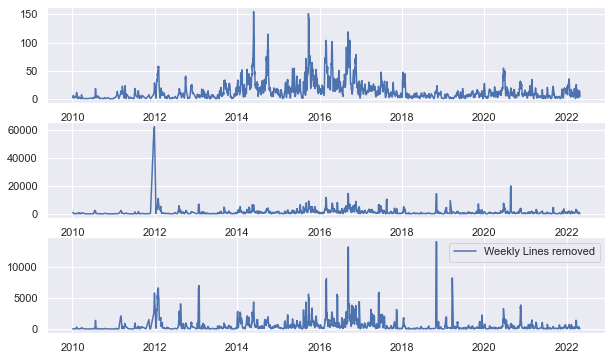

In [48]:
fig,ax = plt.subplots(3)
ax[0].plot(grouped_df['commits_7d'],label = "Weekly commits")
ax[1].plot(grouped_df['changes_7d_lines_added'],label = "Weekly Lines added")
ax[2].plot(grouped_df['changes_7d_lines_removed'],label = "Weekly Lines removed")
plt.legend()

In [32]:
grouped_df.to_pickle("grouped_df.pkl")
#log4j = pd.read_pickle("log4j_df.pkl")